# Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import requests
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

# Load Models

In [2]:
model_gender = load_model('model_gender.keras',  compile=False, custom_objects={"<lambda>": lambda x: x}, safe_mode=False)
model_ethnicity = load_model('model_ethnicity.keras',  compile=False, custom_objects={"<lambda>": lambda x: x}, safe_mode=False)
model_age = load_model('model_age.keras',  compile=False, custom_objects={"<lambda>": lambda x: x}, safe_mode=False)

# Inference From URL

## Inference File From URL

In [3]:
image_url = 'https://1.bp.blogspot.com/-fsYde9BTevg/X2IAhWHg9JI/AAAAAAAAYpg/c2-hioWsWjwOdtCzbdHI2hZ8WULoECAoACLcBGAsYHQ/s2048/3fd9aa39f516a33eb6320aab466e78de.jpg'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

## Preprocessing File URL

In [4]:
img = img.resize((48, 48))
img_array = np.array(img.convert("L"))  # Convert ke mode grayscale
img_array = img_array.reshape((*(48, 48), 1))  # Menambahkan dimensi kedalam
img_array = img_array / 255.0 
input_image = np.expand_dims(img_array, axis=0)

## Model Prediction File URL

1/1 [==============================] - 0s 25ms/step
Prediction gender is a Woman
Prediction ethnicity is a Others
Prediction age is a 13-18


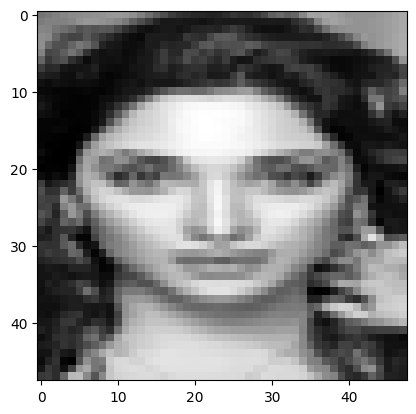

In [10]:
plt.imshow(img_array, cmap='gray')
classes = model_gender.predict(input_image)
idx_1 = np.where(classes >= 0.35, 1, 0).item()
label_1 = ['Man','Woman']
classes_2 = model_ethnicity.predict(input_image)
idx_2 = np.argmax(classes_2, axis=1).item()
label_2 = ['White', 'Black', 'Asian', 'Indian', 'Others']
classes_3 = model_age.predict(input_image)
idx_3 = np.argmax(classes_3, axis=1).item()
label_3 = ['0-2','3-12', '13-18', '19-60', '60-116']
print('Prediction gender is a {}'.format(label_1[idx_1]))
print('Prediction ethnicity is a {}'.format(label_2[idx_2]))
print('Prediction age is a {}'.format(label_3[idx_3]))

# Inference From Local

## Inference File From Local

In [6]:
file = '17170336c18c19e086bc0c53ac45b46d.jpg'

## Prepocesing File Local

In [7]:
img = tf.keras.utils.load_img(file, target_size=(48,48), color_mode='grayscale')
x = tf.keras.utils.img_to_array(img)/255
input_image2 = np.expand_dims(x, axis=0)

## Model Prediction File Local

1/1 [==============================] - 0s 24ms/step
Prediction gender is a Woman
Prediction ethnicity is a Indian
Prediction age is a 19-60


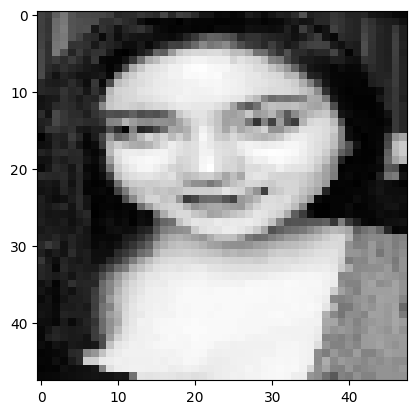

In [9]:
plt.imshow(img, cmap='gray')
classes = model_gender.predict(input_image2)
idx1 = np.where(classes >= 0.35, 1, 0).item()
label1 = ['Man','Woman']
classes2 = model_ethnicity.predict(input_image2)
idx2 = np.argmax(classes2, axis=1).item()
label2 = ['White', 'Black', 'Asian', 'Indian', 'Others']
classes3 = model_age.predict(input_image2)
idx3 = np.argmax(classes3, axis=1).item()
label3 = ['0-2','3-12', '13-18', '19-60', '60-116']
print('Prediction gender is a {}'.format(label1[idx1]))
print('Prediction ethnicity is a {}'.format(label2[idx2]))
print('Prediction age is a {}'.format(label3[idx3]))